In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
# === Pengaturan ===
DATA_FOLDER = "./"  # folder tempat file CSV, ubah jika perlu
CSV_PATTERN = os.path.join(DATA_FOLDER, "ecg_hr_125hz_*.csv")

In [3]:
# === Baca semua file CSV ===
csv_paths = sorted(glob.glob(CSV_PATTERN))
all_data = []

for path in csv_paths:
    filename = os.path.basename(path).replace(".csv", "")
    parts = filename.split("_")
    name_cond = parts[-1]

    for i, c in enumerate(name_cond):
        if c.isdigit():
            subject = name_cond[:i]
            condition = f"cond_{name_cond[i:]}"
            break

    df = pd.read_csv(path)
    df["subject"] = subject
    df["condition"] = condition
    all_data.append(df)

df_all = pd.concat(all_data, ignore_index=True)

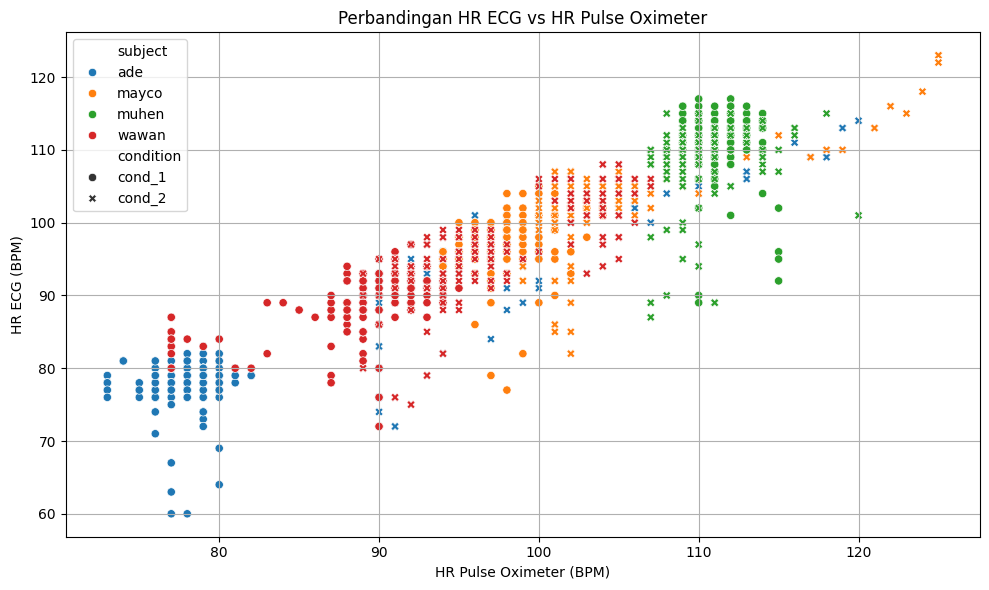

In [4]:
# === Visualisasi Scatter Plot Semua Subjek ===
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_all, x="HR_PulseOx", y="HR_ECG", hue="subject", style="condition", palette="tab10")
plt.title("Perbandingan HR ECG vs HR Pulse Oximeter")
plt.xlabel("HR Pulse Oximeter (BPM)")
plt.ylabel("HR ECG (BPM)")
plt.grid(True)
plt.tight_layout()
plt.savefig("plot_hr_scatter_all.png")
plt.show()

In [5]:
# === Regresi Linear ===
X_all = df_all["HR_PulseOx"].values.reshape(-1, 1)
y_all = df_all["HR_ECG"].values
reg_all = LinearRegression().fit(X_all, y_all)
y_pred_all = reg_all.predict(X_all)

slope = reg_all.coef_[0]
intercept = reg_all.intercept_
r_squared = reg_all.score(X_all, y_all)

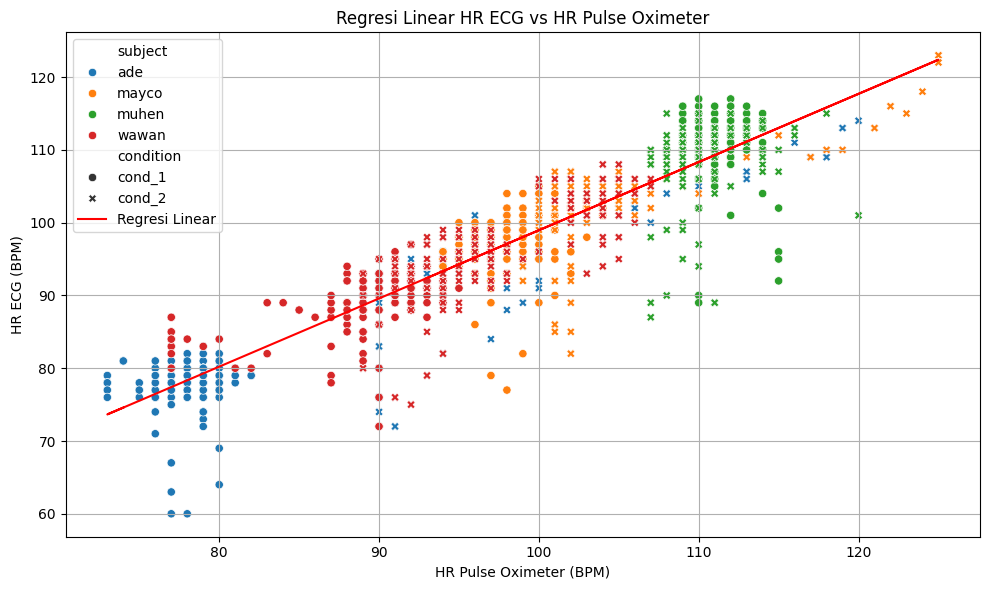

In [6]:
# === Plot dengan Garis Regresi ===
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_all["HR_PulseOx"], y=df_all["HR_ECG"], hue=df_all["subject"], style=df_all["condition"])
plt.plot(df_all["HR_PulseOx"], y_pred_all, color="red", label="Regresi Linear")
plt.title("Regresi Linear HR ECG vs HR Pulse Oximeter")
plt.xlabel("HR Pulse Oximeter (BPM)")
plt.ylabel("HR ECG (BPM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plot_regresi_linear.png")
plt.show()


In [ ]:
# === Evaluasi Error ===
mae = mean_absolute_error(y_all, y_pred_all)
rmse = np.sqrt(mean_squared_error(y_all, y_pred_all))

# === Tampilkan Hasil Regresi ===
print("=== HASIL REGRESI LINEAR GABUNGAN ===")
print(f"Persamaan   : HR_ECG = {slope:.3f} * HR_PulseOx + {intercept:.3f}")
print(f"R² Score    : {r_squared:.3f}")
print(f"MAE         : {mae:.3f} BPM")
print(f"RMSE        : {rmse:.3f} BPM")
print(f"Total Sampel: {len(df_all)}")

=== HASIL REGRESI LINEAR GABUNGAN ===
Persamaan   : HR_ECG = 0.937 * HR_PulseOx + 5.249
R² Score    : 0.857
MAE         : 2.850 BPM
RMSE        : 4.264 BPM
Total Sampel: 1192
